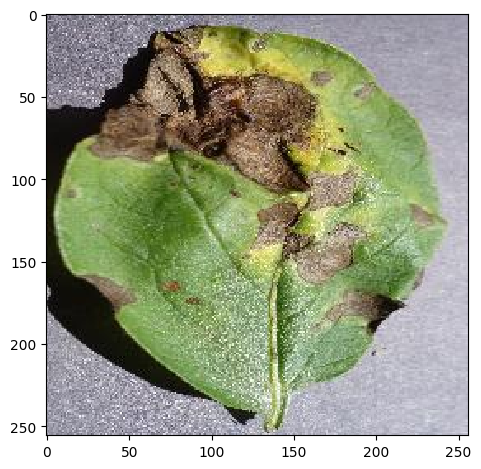

In [11]:
# import required libraries
from skimage import io
import numpy as np
image = io.imread(r'C:\Users\Arfan Shah\potato_data\binary\Train\B(Unhealthy)\1.jpg')
io.imshow(image)

In [12]:
image

array([[[151, 147, 162],
        [104, 100, 115],
        [117, 113, 128],
        ...,
        [160, 157, 174],
        [154, 151, 168],
        [148, 145, 162]],

       [[138, 134, 149],
        [132, 128, 143],
        [112, 108, 123],
        ...,
        [164, 161, 178],
        [159, 156, 173],
        [154, 151, 168]],

       [[105, 101, 116],
        [154, 150, 165],
        [ 82,  78,  93],
        ...,
        [166, 163, 180],
        [164, 161, 178],
        [161, 158, 175]],

       ...,

       [[159, 158, 172],
        [135, 134, 148],
        [151, 150, 164],
        ...,
        [200, 199, 213],
        [196, 195, 209],
        [193, 192, 206]],

       [[168, 167, 181],
        [152, 151, 165],
        [145, 144, 158],
        ...,
        [219, 218, 232],
        [221, 220, 234],
        [221, 220, 234]],

       [[136, 135, 149],
        [180, 179, 193],
        [152, 151, 165],
        ...,
        [192, 191, 205],
        [193, 192, 206],
        [192, 191, 205]]

In [13]:
height, width, channels = image.shape

print(height, width, channels)

256 256 3


In [14]:
image.shape

(256, 256, 3)

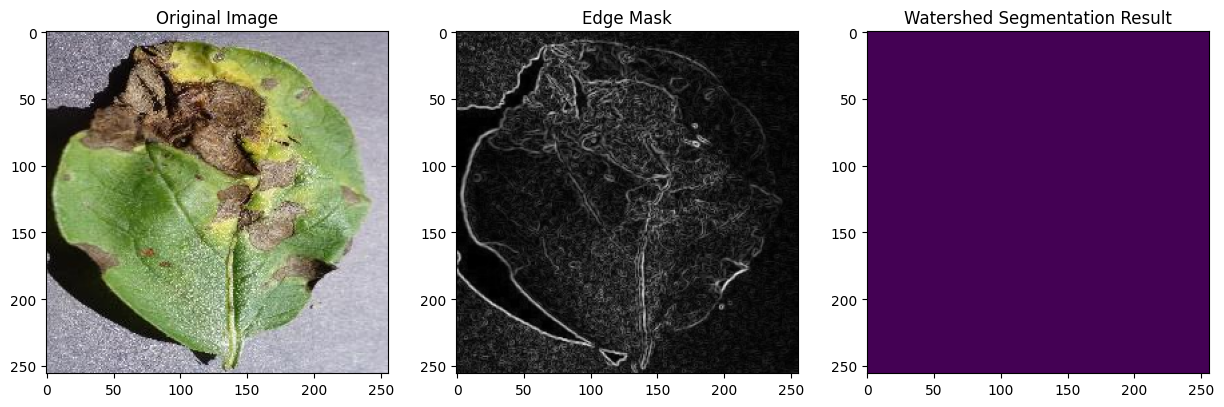

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters
from skimage.segmentation import watershed
from skimage.color import rgb2gray
from skimage.measure import label, regionprops
from skimage.morphology import disk, binary_erosion
from skimage import util

# Convert the image to floating point representation
image_float = util.img_as_float(image)

# Convert the image to grayscale
image_gray = rgb2gray(image_float)

# Create an edge mask using Sobel filter
edges = filters.sobel(image_gray)

# Generate markers for watershed segmentation
markers = np.zeros_like(image_gray)
markers[image_gray < 0.7] = 1
markers[image_gray > 0.9] = 2

# Erode markers to separate regions
markers = binary_erosion(markers, disk(2))

# Apply watershed segmentation
segmentation = watershed(edges, markers)

# Label the regions and get region properties
labeled_regions = label(segmentation)
region_props = regionprops(labeled_regions)

# Visualize the original image, edge mask, and the segmented result
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.imshow(image)
ax1.set_title('Original Image')

ax2.imshow(edges, cmap='gray')
ax2.set_title('Edge Mask')

ax3.imshow(segmentation, cmap='viridis')
ax3.set_title('Watershed Segmentation Result')

plt.show()


In [19]:
# extract features and then store in an excel file
import xlsxwriter as xlsx

# add workbook
workbook = xlsx.Workbook('potato_features.xlsx')

# add worksheet
worksheet = workbook.add_worksheet()

# write the features in columns
worksheet.write('A1', 'Red_Mean')
worksheet.write('B1', 'Red_Median')
worksheet.write('C1', 'Red_Variance')
worksheet.write('D1', 'Red_Std')
worksheet.write('E1', 'Green_Mean')
worksheet.write('F1', 'Green_Median')
worksheet.write('G1', 'Green_Variance')
worksheet.write('H1', 'Green_Std')
worksheet.write('I1', 'Blue_Mean')
worksheet.write('J1', 'Blue_Median')
worksheet.write('K1', 'Blue_Variance')
worksheet.write('L1', 'Blue_Std')
workbook.close()

In [20]:
# now read images from the directory
import glob

# make an empty list then add images arrays to it
images_list = []

# read each image and then add it to the empty list declared above
for file in glob.glob(r'C:\Users\Arfan Shah\potato_data\binary\Train\B(Unhealthy)\*.*'):
    image = io.imread(file)
    
    # append to list
    images_list.append(image)

print(len(images_list))

1910


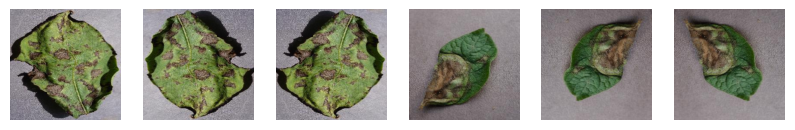

In [21]:
import matplotlib.pyplot as plt
# lets show few images
fig, axes = plt.subplots(1, 6, figsize = (10, 5))

# loop through and display images
for x in range(min(6, len(images_list))):
    axes[x].imshow(images_list[x], cmap = 'gray')
    axes[x].axis('off')
plt.show()

In [29]:
# now convert the image into array and then extract features
import math
import openpyxl
for y in range(len(images_list)):
    image = images_list[y]
    image_array = np.asarray(image)

    # split image data into red, green, and blue
    red = image_array[:, :, 0]
    green = image_array[:, :, 1]
    blue = image_array[:, :, 2]

    # features for Red channel
    Red_mean = np.mean(red)
    print(Red_mean)
    Red_median = np.median(red)
    print(Red_median)
    Red_variance = np.var(red)
    print(Red_variance)
    Red_std = math.sqrt(Red_variance)
    print(Red_std)

    # features for Green channel
    Green_mean = np.mean(green)
    print(Green_mean)
    Green_median = np.median(green)
    print(Green_median)
    Green_variance = np.var(green)
    print(Green_variance)
    Green_std = math.sqrt(Green_variance)
    print(Green_std)

    # features for Blue channel
    Blue_mean = np.mean(blue)
    print(Blue_mean)
    Blue_median = np.median(blue)
    print(Blue_median)
    Blue_variance = np.var(blue)
    print(Blue_variance)
    Blue_std = math.sqrt(Blue_variance)
    print(Blue_std)

    # values in list form
    values = [Red_mean, Red_median, Red_variance, Red_std, Green_mean, Green_median, Green_variance, Green_std, Blue_mean, Blue_median, Blue_variance, Blue_std]

    #writes into the general file
    outWorkbook = openpyxl.load_workbook("potato_features.xlsx") 
    outSheet = outWorkbook.active
    outSheet.append(values)
    
    #here the general file is being saved
    outWorkbook.save(filename="potato_features.xlsx")
    

119.12699890136719
130.0
2515.506408510497
50.154824379220955
121.58421325683594
136.0
2561.411395676201
50.610388218983275
98.03530883789062
95.0
3322.6429793601856
57.642371389110856
119.13021850585938
130.0
2514.9934496348724
50.149710364416585
121.58345031738281
136.0
2561.3765504488256
50.61004396805861
98.05697631835938
95.0
3320.58751297649
57.62453915630467
119.12940979003906
130.0
2515.0548320857342
50.15032235275995
121.58212280273438
136.0
2561.4486391460523
50.61075616058361
98.0572509765625
95.0
3320.3902464956045
57.622827477446855
116.41207885742188
127.0
1340.4097198238596
36.61160635404925
113.206787109375
120.0
921.1892337203026
30.351099382399685
105.87237548828125
119.0
1684.1600425504148
41.03851901019839
116.4107666015625
127.0
1340.321779832244
36.610405349193336
113.20693969726562
120.0
921.2084271823987
30.351415571310653
105.87208557128906
119.0
1684.228861897951
41.03935747423382
116.41207885742188
127.0
1340.4097198238596
36.61160635404925
113.206787109375
1